### Jupyter notebook setup

In [65]:
# zid：z5660625 Name：HangJi Liu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from env import GridWorldEnv

np.random.seed(42)

%matplotlib inline
plt.style.use('default')

### Task 1：Implement Q-learning

pygame 2.6.1 (SDL 2.28.4, Python 3.12.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


Training: 100%|██████████| 1000/1000 [00:00<00:00, 10464.31it/s]

Q-table saved to models/task1_q_table.npy

=== Performance Summary ===
Success Rate: 94.40%
Average Reward per Episode: 1.16
Average Learning Speed (ALS): 0.0454


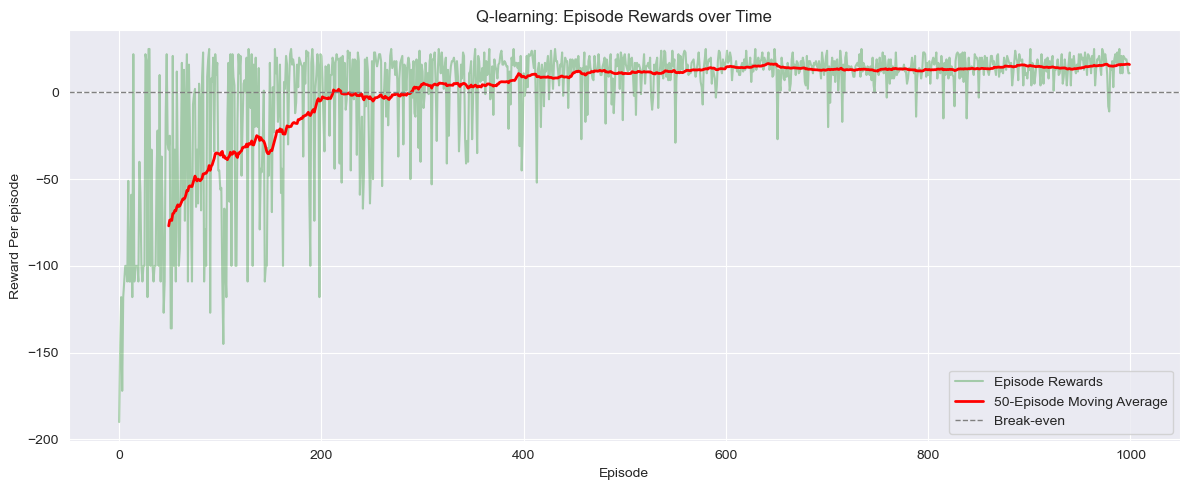

In [1]:
from env import GridWorldEnv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Parameter Settings
episodes = 1000
learn_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
max_steps = 100

# Environment and Q-table Initialization
env = GridWorldEnv(seed=42)
Q = np.zeros((env.grid_size, env.grid_size, env.action_space))

# Metric Tracking
q_rewards = []
steps_per_episode = []
q_successes = []

# Q-learning Main Loop
for ep in tqdm(range(episodes), desc="Training"):
    state = env.reset()
    total_reward = 0
    done = False

    for step in range(max_steps):
        x, y = state
        # ε-greedy Action Selection
        # update formula：Q(s, a) ← Q(s, a) + α * [r + γ * max(Q(s’, a’)) - Q(s, a)]
        if np.random.rand() < exploration_rate:
            action = np.random.randint(env.action_space)
        else:
            action = np.argmax(Q[x, y])
        next_state, reward, done, _ = env.step(action)
        next_x, next_y = next_state

        # Q-value Update
        best_next_action = np.argmax(Q[next_x, next_y])
        td_target = reward + discount_factor * Q[next_x, next_y, best_next_action]
        td_error = td_target - Q[x, y, action]
        Q[x, y, action] += learn_rate * td_error

        state = next_state
        total_reward += reward

        if done:
            break

    q_rewards.append(total_reward)
    steps_per_episode.append(step + 1)
    q_successes.append(1 if state == env.goal else 0)

# Save Q-table
np.save("models/task1_q_table.npy", Q)
print("Q-table saved to models/task1_q_table.npy")

# Print Performance Summary
success_rate = sum(q_successes) / episodes
avg_steps = np.mean(steps_per_episode)
ALS = 1.0 / avg_steps
avg_reward = np.mean(q_rewards)

print(f"\n=== Performance Summary ===")
print(f"Success Rate: {success_rate:.2%}")
#print(f"Average Steps per Episode: {avg_steps:.2f}")
print(f"Average Reward per Episode: {avg_reward:.2f}")
print(f"Average Learning Speed (ALS): {ALS:.4f}")


# Plotting: Reward Curve and Moving Average

def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

plt.figure(figsize=(12, 5))
plt.plot(q_rewards, label="Episode Rewards", alpha=0.3, color='green')
smoothed = moving_average(q_rewards, window_size=50)
plt.plot(range(49, 49 + len(smoothed)), smoothed, label="50-Episode Moving Average", color='red', linewidth=2)
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1, label='Break-even')
plt.title("Q-learning: Episode Rewards over Time")
plt.xlabel("Episode")
plt.ylabel("Reward Per episode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2：Implement SARSA

Training (SARSA): 100%|██████████| 1000/1000 [00:00<00:00, 11733.80it/s]

Q-table saved to models/task2_s_table.npy

=== Performance Summary (SARSA) ===
Success Rate: 94.40%
Average Steps per Episode: 22.62
Average Reward per Episode: 0.34
Average Learning Speed (ALS): 0.0442


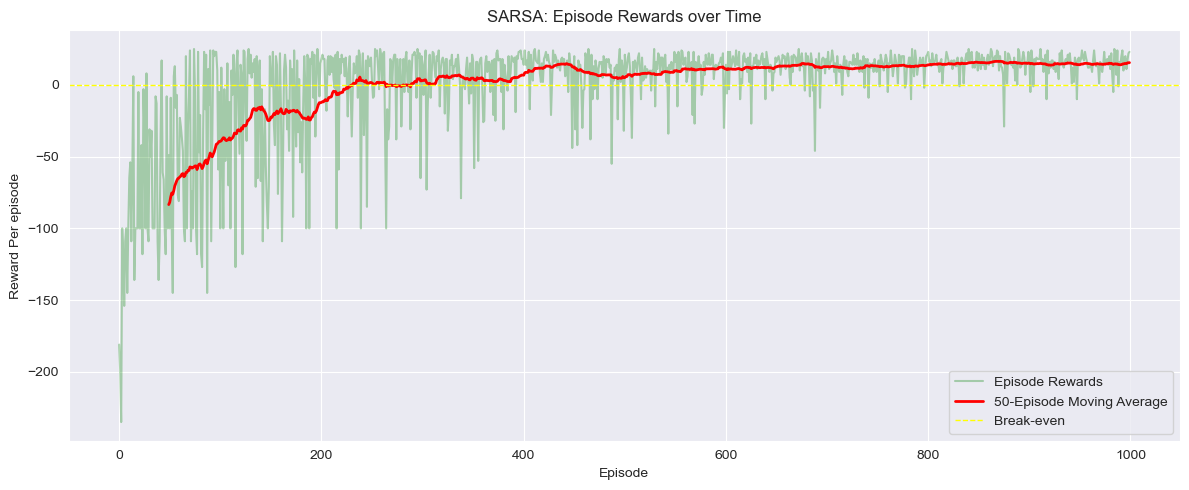

In [2]:
from env import GridWorldEnv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# parameter setting
episodes = 1000
learn_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
max_steps = 100

# Initialize environment and Q-table
env = GridWorldEnv(seed=42)
Q = np.zeros((env.grid_size, env.grid_size, env.action_space))

# data record lists
sarsa_rewards = []
steps_per_episode = []
sarsa_successes = []


# ε-greedy policy
def choose_action(state, Q, exploration_rate):
    x, y = state
    if np.random.rand() < exploration_rate:
        return np.random.randint(env.action_space)
    return np.argmax(Q[x, y])


# SARSA training loop
for ep in tqdm(range(episodes), desc="Training (SARSA)"):
    state = env.reset()
    x, y = state
    action = choose_action(state, Q, exploration_rate)

    total_reward = 0
    done = False

    for step in range(max_steps):
        next_state, reward, done, _ = env.step(action)
        next_x, next_y = next_state
        next_action = choose_action(next_state, Q, exploration_rate)
        # update Q value
        # formula：Q(s, a) ← Q(s, a) + α * [r + γ * Q(s', a') − Q(s, a)]
        td_target = reward + discount_factor * Q[next_x, next_y, next_action]
        td_error = td_target - Q[x, y, action]
        Q[x, y, action] += learn_rate * td_error

        state = next_state
        x, y = state
        action = next_action
        total_reward += reward

        if done:
            break

    sarsa_rewards.append(total_reward)
    steps_per_episode.append(step + 1)
    sarsa_successes.append(1 if state == env.goal else 0)

# Save Q-table
np.save("models/task2_s_table.npy", Q)
print("Q-table saved to models/task2_s_table.npy")

# Statistics summary
success_rate = sum(sarsa_successes) / episodes
avg_steps = np.mean(steps_per_episode)
ALS = 1.0 / avg_steps
avg_reward = np.mean(sarsa_rewards)

print(f"\n=== Performance Summary (SARSA) ===")
print(f"Success Rate: {success_rate:.2%}")
# print(f"Average Steps per Episode: {avg_steps:.2f}")
print(f"Average Reward per Episode: {avg_reward:.2f}")
print(f"Average Learning Speed (ALS): {ALS:.4f}")


# Plotting reward curve
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


plt.figure(figsize=(12, 5))
plt.plot(sarsa_rewards, label="Episode Rewards", alpha=0.3, color='green')
smoothed = moving_average(sarsa_rewards, window_size=50)
plt.plot(range(49, 49 + len(smoothed)), smoothed, label="50-Episode Moving Average", color='red', linewidth=2)
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1, label='Break-even')
plt.title("SARSA: Episode Rewards over Time")
plt.xlabel("Episode")
plt.ylabel("Reward Per episode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Baseline Comparison

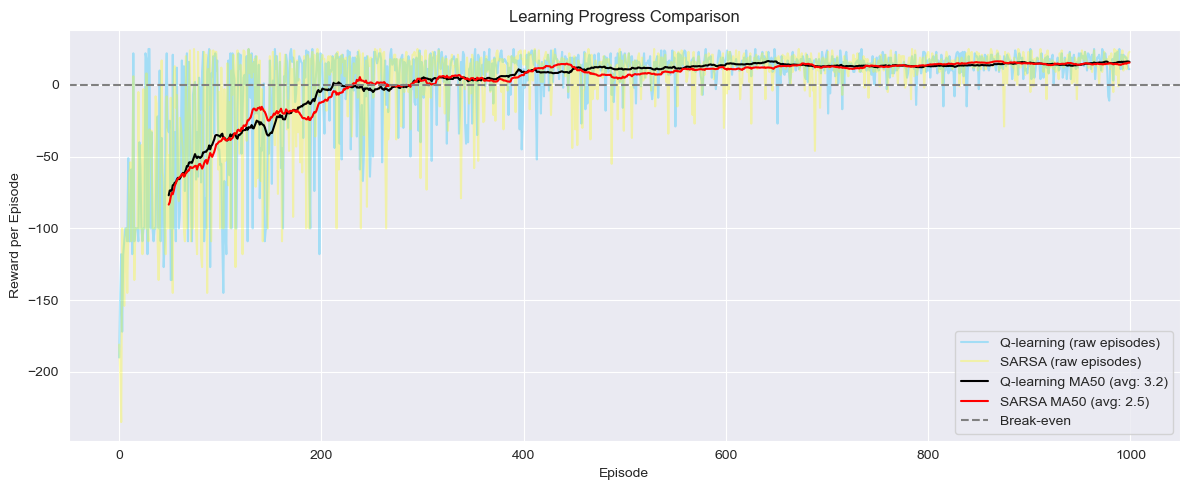

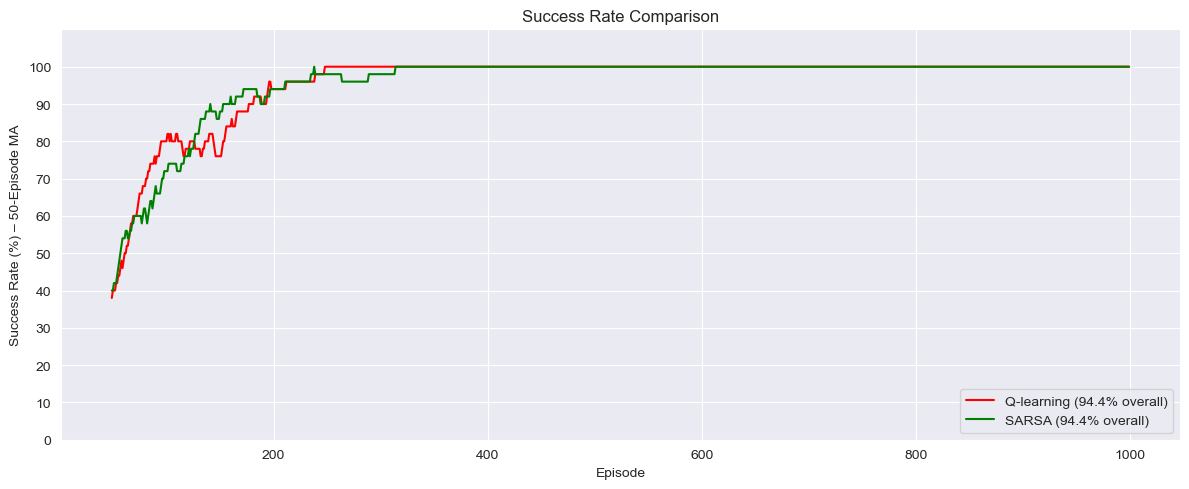

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# average function definition
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


# compute average value
q_avg_rewards = moving_average(q_rewards)
sarsa_avg_rewards = moving_average(sarsa_rewards)
q_avg_success = moving_average(q_successes)
sarsa_avg_success = moving_average(sarsa_successes)

# Graph1: Learning process comparison
plt.figure(figsize=(12, 5))
plt.plot(q_rewards, alpha=0.3, label='Q-learning (raw episodes)', color='deepskyblue')
plt.plot(sarsa_rewards, alpha=0.3, label='SARSA (raw episodes)', color='yellow')
plt.plot(range(49, 49 + len(q_avg_rewards)), q_avg_rewards,
         label=f'Q-learning MA50 (avg: {np.mean(q_avg_rewards):.1f})', color='black')
plt.plot(range(49, 49 + len(sarsa_avg_rewards)), sarsa_avg_rewards,
         label=f'SARSA MA50 (avg: {np.mean(sarsa_avg_rewards):.1f})', color='red')
plt.axhline(y=0, color='gray', linestyle='--', label='Break-even')
plt.title('Learning Progress Comparison')
plt.xlabel('Episode')
plt.ylabel('Reward per Episode')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph2: Success rate comparison
q_overall = 100 * np.mean(q_successes)
sarsa_overall = 100 * np.mean(sarsa_successes)
plt.figure(figsize=(12, 5))
plt.plot(range(49, 49 + len(q_avg_success)), q_avg_success * 100,
         label=f'Q-learning ({q_overall:.1f}% overall)', color='red')
plt.plot(range(49, 49 + len(sarsa_avg_success)), sarsa_avg_success * 100,
         label=f'SARSA ({sarsa_overall:.1f}% overall)', color='green')

plt.title('Success Rate Comparison')
plt.xlabel('Episode')
plt.ylabel('Success Rate (%) – 50-Episode MA')
plt.ylim(0, 110)
plt.yticks(np.linspace(0, 100, 11))
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Teacher Advice Using Q-learning Agent


Training with Teacher availability=0.1, accuracy=0.1


A=0.1_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 8145.24it/s]



Training with Teacher availability=0.1, accuracy=0.3


A=0.1_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 8350.93it/s]



Training with Teacher availability=0.1, accuracy=0.5


A=0.1_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 9163.05it/s]



Training with Teacher availability=0.1, accuracy=0.7


A=0.1_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 9386.93it/s]



Training with Teacher availability=0.1, accuracy=1.0


A=0.1_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 10942.59it/s]



Training with Teacher availability=0.3, accuracy=0.1


A=0.3_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 6250.23it/s]



Training with Teacher availability=0.3, accuracy=0.3


A=0.3_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 6192.18it/s]



Training with Teacher availability=0.3, accuracy=0.5


A=0.3_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 7464.02it/s]



Training with Teacher availability=0.3, accuracy=0.7


A=0.3_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8351.43it/s]



Training with Teacher availability=0.3, accuracy=1.0


A=0.3_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 10665.88it/s]



Training with Teacher availability=0.5, accuracy=0.1


A=0.5_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 3678.11it/s]



Training with Teacher availability=0.5, accuracy=0.3


A=0.5_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 4926.26it/s]



Training with Teacher availability=0.5, accuracy=0.5


A=0.5_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 6244.03it/s]



Training with Teacher availability=0.5, accuracy=0.7


A=0.5_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8842.59it/s]



Training with Teacher availability=0.5, accuracy=1.0


A=0.5_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 14292.49it/s]



Training with Teacher availability=0.7, accuracy=0.1


A=0.7_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 1858.61it/s]



Training with Teacher availability=0.7, accuracy=0.3


A=0.7_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 3123.35it/s]



Training with Teacher availability=0.7, accuracy=0.5


A=0.7_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 5108.40it/s]



Training with Teacher availability=0.7, accuracy=0.7


A=0.7_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 9155.15it/s]



Training with Teacher availability=0.7, accuracy=1.0


A=0.7_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 17616.76it/s]



Training with Teacher availability=1.0, accuracy=0.1


A=1.0_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 1085.27it/s]



Training with Teacher availability=1.0, accuracy=0.3


A=1.0_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 1509.36it/s]



Training with Teacher availability=1.0, accuracy=0.5


A=1.0_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 3643.16it/s]



Training with Teacher availability=1.0, accuracy=0.7


A=1.0_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8895.30it/s]



Training with Teacher availability=1.0, accuracy=1.0


A=1.0_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 17086.13it/s]



=== Summary Results ===
Availability   Accuracy   Success Rate (%)   Avg Reward   Avg Learning Speed
---------------------------------------------------------------------------
         0.1        0.1              93.20      -0.7680               0.0434
         0.1        0.3              93.40      -0.3160               0.0439
         0.1        0.5              94.30       1.0070               0.0453
         0.1        0.7              94.90       1.5020               0.0457
         0.1        1.0              94.10       2.0270               0.0470
         0.3        0.1              93.40      -7.7100               0.0363
         0.3        0.3              94.00      -4.7990               0.0385
         0.3        0.5              93.70      -2.4160               0.0409
         0.3        0.7              94.50      -0.2690               0.0431
         0.3        1.0              97.30       3.4300               0.0479
         0.5        0.1              90.60     -24.0

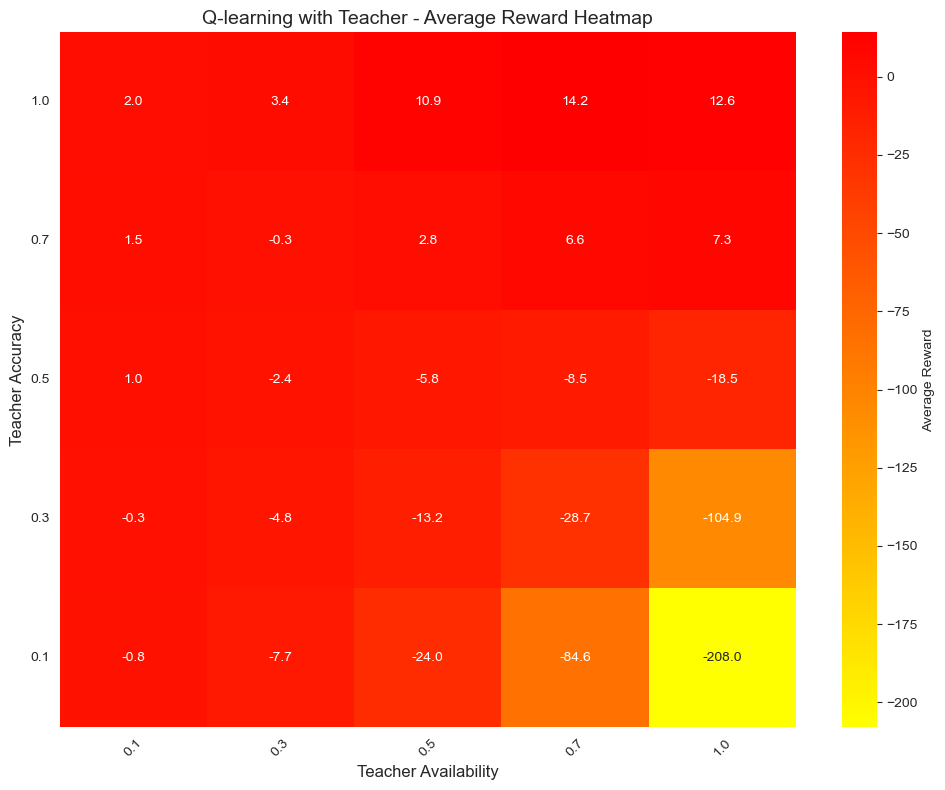

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from env import GridWorldEnv
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# parameter
episodes = 1000
learn_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
max_steps = 100

# load Q table from task1
teacher_Q = np.load("models/task1_q_table.npy")

# Teacher parameter lists
availabilities = [0.1, 0.3, 0.5, 0.7, 1.0]
accuracies = [0.1, 0.3, 0.5, 0.7, 1.0]

# initial dicts to store data
all_rewards_q = {}
all_success_rates = {}
all_steps = {}

# Begin training
for availability in availabilities:
    for accuracy in accuracies:
        key = f"A={availability}_C={accuracy}"
        print(f"\nTraining with Teacher availability={availability}, accuracy={accuracy}")

        # initial environment and Q table-student
        env = GridWorldEnv(seed=42)
        Q = np.zeros((env.grid_size, env.grid_size, env.action_space))

        rewards = []
        successes = []
        steps_per_episode = []

        for ep in tqdm(range(episodes), desc=key):
            state = env.reset()
            total_reward = 0
            done = False

            for step in range(max_steps):
                x, y = state

                # whether using teacher's suggestion
                use_teacher = np.random.rand() < availability
                # use
                if use_teacher:
                    # right suggestion-choose the max Q-value in teacher's Q table
                    if np.random.rand() < accuracy:
                        action = np.argmax(teacher_Q[x, y])
                    else:
                        # wrong suggestion-choose random Q value in teacher's Q table excluded the best choice
                        best_action = np.argmax(teacher_Q[x, y])
                        action = np.random.choice([a for a in range(env.action_space) if a != best_action])
                # don't use
                else:
                    # greedy strategy
                    if np.random.rand() < exploration_rate:
                        action = np.random.randint(env.action_space)
                    else:
                        action = np.argmax(Q[x, y])

                next_state, reward, done, _ = env.step(action)
                next_x, next_y = next_state

                # update Q value in student's Q table
                best_next_action = np.argmax(Q[next_x, next_y])
                td_target = reward + discount_factor * Q[next_x, next_y, best_next_action]
                td_error = td_target - Q[x, y, action]
                Q[x, y, action] += learn_rate * td_error

                state = next_state
                total_reward += reward

                if done:
                    break

            rewards.append(total_reward)
            successes.append(1 if state == env.goal else 0)
            steps_per_episode.append(step + 1)

        all_rewards_q[key] = rewards
        all_success_rates[key] = successes
        all_steps[key] = steps_per_episode

# produce outputs
print("\n=== Summary Results ===")
print(f"{'Availability':>12} {'Accuracy':>10} {'Success Rate (%)':>18} {'Avg Reward':>12} {'Avg Learning Speed':>20}")
print("-" * 75)

for availability in availabilities:
    for accuracy in accuracies:
        key = f"A={availability}_C={accuracy}"
        # calculate performance matrix
        success_rate = 100 * np.mean(all_success_rates[key])
        avg_reward = np.mean(all_rewards_q[key])
        steps = np.array(all_steps[key])
        avg_steps = np.mean(steps)
        avg_learning_speed = 1 / avg_steps
        print(
            f"{availability:12.1f} {accuracy:10.1f} {success_rate:18.2f} {avg_reward:12.4f} {avg_learning_speed:20.4f}")

# drawing heap graph
reward_matrix = np.zeros((len(accuracies), len(availabilities)))  # shape: [5, 5]
for i, acc in enumerate(accuracies):
    for j, avail in enumerate(availabilities):
        key = f"A={avail}_C={acc}"
        reward_matrix[i, j] = np.mean(all_rewards_q[key])

vmin = np.min(reward_matrix)
vmax = np.max(reward_matrix)
red_yellow = LinearSegmentedColormap.from_list("RedYellow", ["yellow", "red"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    reward_matrix,
    annot=True, fmt=".1f",
    cmap=red_yellow,
    vmin=vmin, vmax=vmax,
    xticklabels=availabilities,
    yticklabels=accuracies,
    cbar_kws={"label": "Average Reward"}
)

plt.title("Q-learning with Teacher - Average Reward Heatmap", fontsize=14)
plt.xlabel("Teacher Availability", fontsize=12)
plt.ylabel("Teacher Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Task4:Teacher Advice Using SARSA Agent


Training with Teacher availability=0.1, accuracy=0.1


A=0.1_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 5661.01it/s]



Training with Teacher availability=0.1, accuracy=0.3


A=0.1_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 5686.44it/s]



Training with Teacher availability=0.1, accuracy=0.5


A=0.1_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 6530.60it/s]



Training with Teacher availability=0.1, accuracy=0.7


A=0.1_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 6065.75it/s]



Training with Teacher availability=0.1, accuracy=1.0


A=0.1_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 5679.89it/s]



Training with Teacher availability=0.3, accuracy=0.1


A=0.3_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 4645.29it/s]



Training with Teacher availability=0.3, accuracy=0.3


A=0.3_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 4767.35it/s]



Training with Teacher availability=0.3, accuracy=0.5


A=0.3_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 5853.81it/s]



Training with Teacher availability=0.3, accuracy=0.7


A=0.3_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 7112.11it/s]



Training with Teacher availability=0.3, accuracy=1.0


A=0.3_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 7950.07it/s]



Training with Teacher availability=0.5, accuracy=0.1


A=0.5_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 3176.05it/s]



Training with Teacher availability=0.5, accuracy=0.3


A=0.5_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 4109.32it/s]



Training with Teacher availability=0.5, accuracy=0.5


A=0.5_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 5596.94it/s]



Training with Teacher availability=0.5, accuracy=0.7


A=0.5_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8508.82it/s]



Training with Teacher availability=0.5, accuracy=1.0


A=0.5_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 12107.39it/s]



Training with Teacher availability=0.7, accuracy=0.1


A=0.7_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 1717.40it/s]



Training with Teacher availability=0.7, accuracy=0.3


A=0.7_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 3184.76it/s]



Training with Teacher availability=0.7, accuracy=0.5


A=0.7_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 5239.80it/s]



Training with Teacher availability=0.7, accuracy=0.7


A=0.7_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8999.76it/s]



Training with Teacher availability=0.7, accuracy=1.0


A=0.7_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 16774.80it/s]



Training with Teacher availability=1.0, accuracy=0.1


A=1.0_C=0.1: 100%|██████████| 1000/1000 [00:00<00:00, 1199.55it/s]



Training with Teacher availability=1.0, accuracy=0.3


A=1.0_C=0.3: 100%|██████████| 1000/1000 [00:00<00:00, 1654.99it/s]



Training with Teacher availability=1.0, accuracy=0.5


A=1.0_C=0.5: 100%|██████████| 1000/1000 [00:00<00:00, 4039.20it/s]



Training with Teacher availability=1.0, accuracy=0.7


A=1.0_C=0.7: 100%|██████████| 1000/1000 [00:00<00:00, 8971.98it/s]



Training with Teacher availability=1.0, accuracy=1.0


A=1.0_C=1.0: 100%|██████████| 1000/1000 [00:00<00:00, 14796.60it/s]



=== Summary Results ===
Availability   Accuracy   Success Rate (%)   Avg Reward   Avg Learning Speed
---------------------------------------------------------------------------
         0.1        0.1              75.10     -34.1410               0.0220
         0.1        0.3              75.60     -35.1900               0.0213
         0.1        0.5              79.10     -30.2750               0.0237
         0.1        0.7              76.90     -30.4640               0.0232
         0.1        1.0              78.70     -31.7290               0.0237
         0.3        0.1              80.30     -33.7120               0.0224
         0.3        0.3              81.00     -30.1400               0.0232
         0.3        0.5              83.40     -26.4210               0.0250
         0.3        0.7              87.60     -22.0060               0.0273
         0.3        1.0              92.60      -9.8370               0.0331
         0.5        0.1              74.30     -46.3

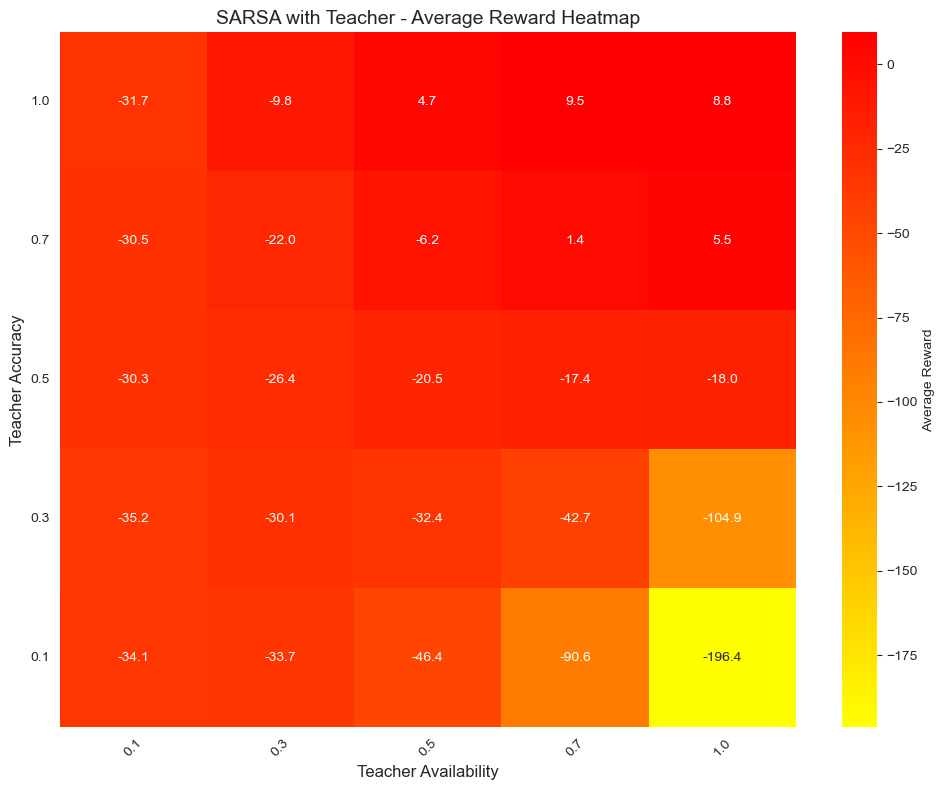

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from env import GridWorldEnv
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Parameters
episodes = 1000
learn_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
max_steps = 100

# Load teacher Q-table from Task 2
teacher_S = np.load("models/task2_s_table.npy")

# Teacher parameter grids
availabilities = [0.1, 0.3, 0.5, 0.7, 1.0]
accuracies = [0.1, 0.3, 0.5, 0.7, 1.0]

# Data storage
all_rewards_sarsa = {}
all_success_rates = {}
all_steps = {}

# Training Loop
for availability in availabilities:
    for accuracy in accuracies:
        key = f"A={availability}_C={accuracy}"
        print(f"\nTraining with Teacher availability={availability}, accuracy={accuracy}")

        env = GridWorldEnv(seed=42)
        Q = np.zeros((env.grid_size, env.grid_size, env.action_space))

        rewards = []
        successes = []
        steps_per_episode = []

        for ep in tqdm(range(episodes), desc=key):
            state = env.reset()
            x, y = state

            if np.random.rand() < availability:
                if np.random.rand() < accuracy:
                    action = np.argmax(teacher_S[x, y])
                else:
                    best = np.argmax(teacher_S[x, y])
                    action = np.random.choice([a for a in range(env.action_space) if a != best])
            else:
                if np.random.rand() < exploration_rate:
                    action = np.random.randint(env.action_space)
                else:
                    np.argmax(Q[x, y])

            total_reward = 0
            done = False

            for step in range(max_steps):
                next_state, reward, done, _ = env.step(action)
                next_x, next_y = next_state

                # next action consideration
                if np.random.rand() < availability:
                    if np.random.rand() < accuracy:
                        next_action = np.argmax(teacher_S[next_x, next_y])
                    else:
                        best = np.argmax(teacher_S[next_x, next_y])
                        next_action = np.random.choice([a for a in range(env.action_space) if a != best])
                else:
                    # greedy strategy
                    if np.random.rand() < exploration_rate:
                        next_action = np.random.randint(env.action_space)
                    else:
                        next_action = np.argmax(Q[x, y])

                # update Q value using SARSA
                td_target = reward + discount_factor * Q[next_x, next_y, next_action]
                td_error = td_target - Q[x, y, action]
                Q[x, y, action] += learn_rate * td_error

                state = next_state
                x, y = state
                action = next_action
                total_reward += reward

                if done:
                    break

            rewards.append(total_reward)
            successes.append(1 if state == env.goal else 0)
            steps_per_episode.append(step + 1)

        all_rewards_sarsa[key] = rewards
        all_success_rates[key] = successes
        all_steps[key] = steps_per_episode

# produce outputs
print("\n=== Summary Results ===")
print(f"{'Availability':>12} {'Accuracy':>10} {'Success Rate (%)':>18} {'Avg Reward':>12} {'Avg Learning Speed':>20}")
print("-" * 75)

for availability in availabilities:
    for accuracy in accuracies:
        key = f"A={availability}_C={accuracy}"
        success_rate = 100 * np.mean(all_success_rates[key])
        avg_reward = np.mean(all_rewards_sarsa[key])
        avg_steps = np.mean(all_steps[key])
        avg_learning_speed = 1 / avg_steps
        print(
            f"{availability:12.1f} {accuracy:10.1f} {success_rate:18.2f} {avg_reward:12.4f} {avg_learning_speed:20.4f}")

# drawing heap graph
reward_matrix = np.zeros((len(accuracies), len(availabilities)))
for i, acc in enumerate(accuracies):
    for j, avail in enumerate(availabilities):
        key = f"A={avail}_C={acc}"
        reward_matrix[i, j] = np.mean(all_rewards_sarsa[key])

vmin = np.min(reward_matrix)
vmax = np.max(reward_matrix)
red_yellow = LinearSegmentedColormap.from_list("RedYellow", ["yellow", "red"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    reward_matrix,
    annot=True, fmt=".1f",
    cmap=red_yellow,
    vmin=vmin, vmax=vmax,
    xticklabels=availabilities,
    yticklabels=accuracies,
    cbar_kws={"label": "Average Reward"}
)

plt.title("SARSA with Teacher - Average Reward Heatmap", fontsize=14)
plt.xlabel("Teacher Availability", fontsize=12)
plt.ylabel("Teacher Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Teacher Impact on Learning Curves

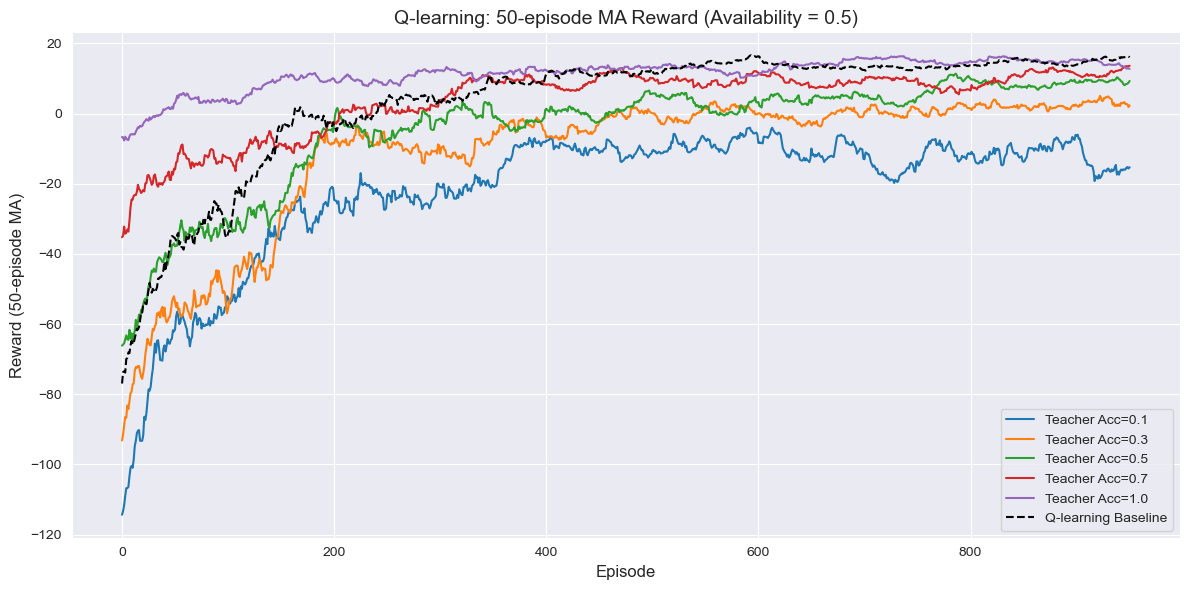

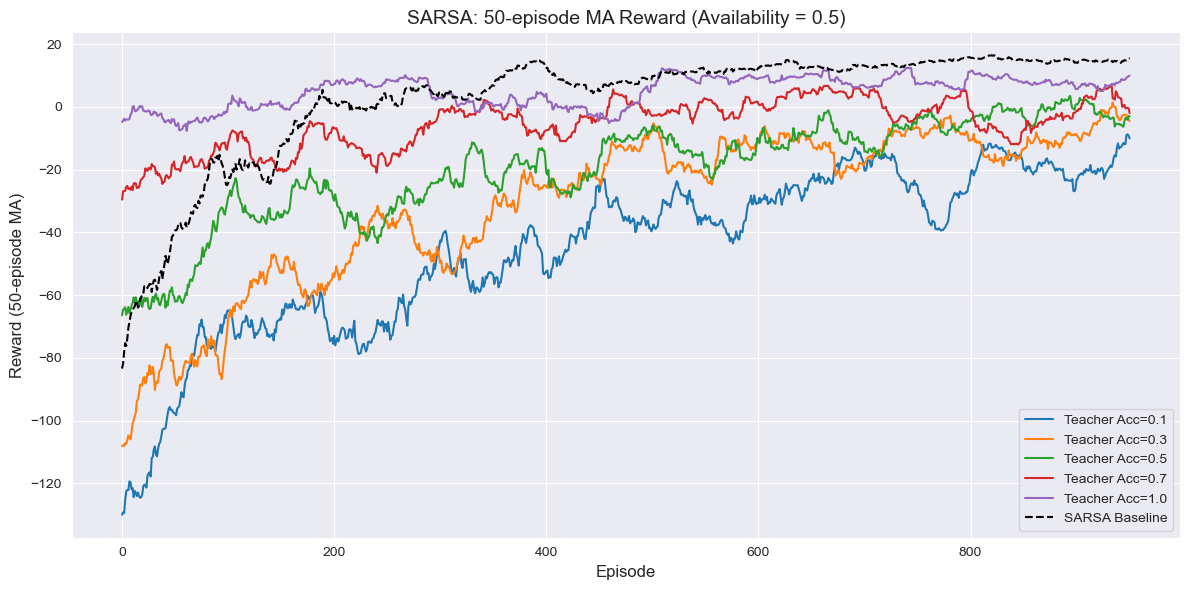

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# 50-episode Moving Average function
def moving_avg(data, window=50):
    return np.convolve(data, np.ones(window) / window, mode="valid")


accuracies = [0.1, 0.3, 0.5, 0.7, 1.0]

# Q-learning
plt.figure(figsize=(12, 6))
for acc in accuracies:
    key = f"A=0.5_C={acc}"
    plt.plot(moving_avg(all_rewards_q[key]), label=f"Teacher Acc={acc}")

plt.plot(moving_avg(q_rewards), label="Q-learning Baseline", linestyle="--", color="black")
plt.title("Q-learning: 50-episode MA Reward (Availability = 0.5)", fontsize=14)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Reward (50-episode MA)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SARSA
plt.figure(figsize=(12, 6))
for acc in accuracies:
    key = f"A=0.5_C={acc}"
    plt.plot(moving_avg(all_rewards_sarsa[key]), label=f"Teacher Acc={acc}")
plt.plot(moving_avg(sarsa_rewards), label="SARSA Baseline", linestyle="--", color="black")

plt.title("SARSA: 50-episode MA Reward (Availability = 0.5)", fontsize=14)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Reward (50-episode MA)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Teacher Effectiveness Summary

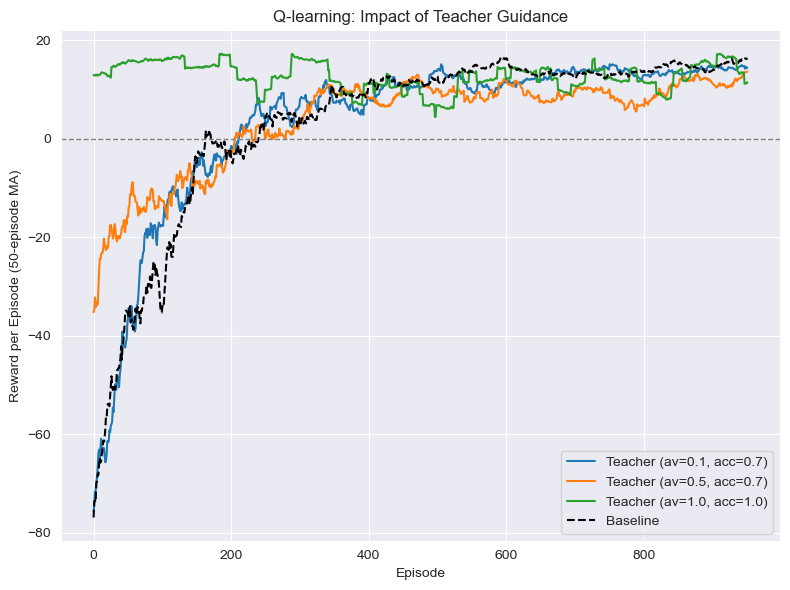

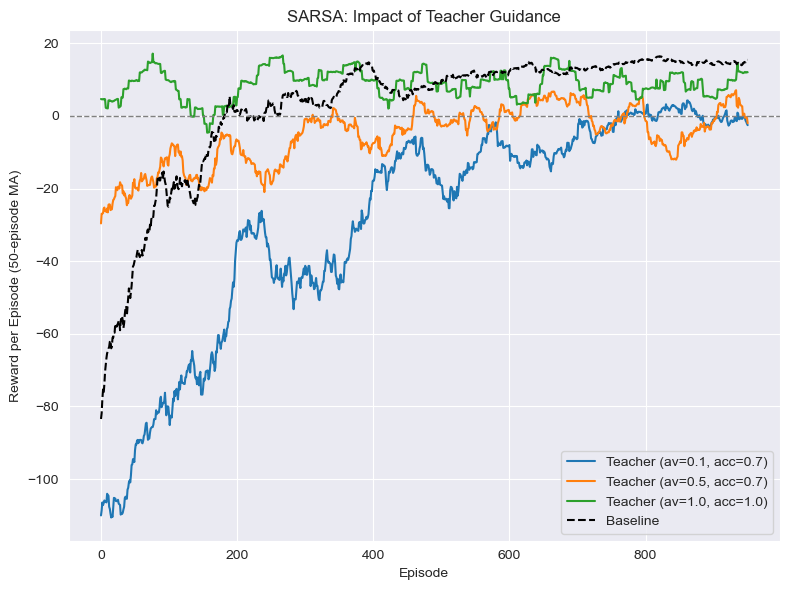

[15, 14, 16, 18, 10, 17, 13, 17, 12, 14]


In [9]:
import numpy as np
import matplotlib.pyplot as plt


def moving_avg(data, window=50):
    return np.convolve(data, np.ones(window) / window, mode="valid")

selected_configs = [(0.1, 0.7), (0.5, 0.7), (1.0, 1.0)]

# Q-learning
plt.figure(figsize=(8, 6))
for avail, acc in selected_configs:
    key = f"A={avail}_C={acc}"
    if key in all_rewards_q:
        rewards = moving_avg(all_rewards_q[key])
        plt.plot(rewards, label=f"Teacher (av={avail}, acc={acc})")

# baseline
plt.plot(moving_avg(q_rewards), "--", color="black", label="Baseline")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)

plt.title("Q-learning: Impact of Teacher Guidance")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode (50-episode MA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print(all_rewards_q["A=1.0_C=1.0"][:10])

# SARSA
plt.figure(figsize=(8, 6))
for avail, acc in selected_configs:
    key = f"A={avail}_C={acc}"
    if key in all_rewards_sarsa:
        rewards = moving_avg(all_rewards_sarsa[key])
        plt.plot(rewards, label=f"Teacher (av={avail}, acc={acc})")

# baseline
plt.plot(moving_avg(sarsa_rewards), "--", color="black", label="Baseline")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)

plt.title("SARSA: Impact of Teacher Guidance")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode (50-episode MA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(all_rewards_q["A=1.0_C=1.0"][:10])